In [4]:
import pandas as pd 

train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

#### Load train and test (optional)

In [5]:
import numpy as np
with open('../data/titanic/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)
with open('../data/titanic/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [6]:
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


#### Analyzing the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cleaning the data

#### General cleaning

In [10]:
# Remove missing "Embarked" data
train = train.dropna(subset=["Embarked"])
# Drop cabin - very little information about it
train = train.drop("Cabin", axis=1)
# Fill missing age with the mean
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### Managing unique data

In [11]:
print('There are {} different (unique) PassengerIds in the data'.format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'.format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'.format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


In [12]:
# Dropping unique identifiers
train = train.drop("PassengerId", axis =1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


#### Handling text and categorical attributes

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex','Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### Feature scaling

In [14]:
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [15]:
# The scaler returns a Numpy-array instead of a Pandas DataFrame.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'.format(train.min(),train.max()))

The minimum value is 0.0 and the maximum value is 1.0


### Splitting data

In [16]:
from sklearn.model_selection import train_test_split

input_data = train[:,1:8]
labels = train[:,0]

train_input, test_input, train_labels, test_labels = train_test_split(input_data,labels,test_size=0.2)

print('we have {} training and {} testing rows'.format(train_input.shape[0],test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

we have 711 training and 178 testing rows
There are 7 input columns


In [17]:
# Saving the data for training and testing 
import numpy as np 

with open('../data/titanic/train.npy','wb') as f:
    np.save(f,train_input)
    np.save(f,train_labels)

with open('../data/titanic/test.npy','wb') as f:
    np.save(f,test_input)
    np.save(f,test_labels)

### Training

In [18]:
# Simple algorithm - random classifier
import random
random.seed(a=None,version=2)

def classify(passenger):
    return random.randint(0,1)

def run(f_classify,x):
    return list(map(f_classify,x))

results = run(classify,train_input)
#print(results)

def evaluate(predictions,actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions,actual))
    ))
    return '{} correct predictions out of {}. Accuracy {:.0f} %' \
            .format(len(correct),len(actual),100*len(correct)/len(actual))

print(evaluate(results,train_labels))

370 correct predictions out of 711. Accuracy 52 %


In [19]:
import numpy as np
with open('../data/titanic/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)
with open('../data/titanic/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [20]:
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))

446 correct predictions out of 711. Accuracy 63 %


In [21]:
#classify_function = classify
classify_function = predict_death


### Confusion Matrix and metrics concepts

TN FP

FN TP

Downwards: Negative predictive value
To the right: Specificity 

* Accuracy: Sum of TP + Sum of TN / total population
* Precision: The precision is the “accuracy of the positive predictions.” Sum of TP / Sum of all predictive positives
* Recall: The recall is the “accuracy of the actual positives.” Sum of TP/ Sum of all actual positives
* Specifity: The specificity is the “accuracy of the actual negatives.” Sum of TN / Sum of actual negatives
* Negative predictive value (NPV): The “negative predictive value” (NPV) is the “accuracy of the negative
predictions.” Sum TN / Sum of all Predictive negatives

Prevalence: the ratio between the two possible values, not being 0.5.

In [22]:
# Confusion matrix 
# True Negatives  | False Positives
# False Negatives | True Positives

from sklearn.metrics import confusion_matrix

predictions = run(classify_function,train_input)
confusion_matrix(train_labels,predictions)


array([[446,   0],
       [265,   0]])

In [23]:
# Precision: is the “accuracy of the positive predictions.” It only looks at the positive predictions. These are predictions that the passenger survived.
# sum(TruePositives)/sum(AllPredictedPositives)

from sklearn.metrics import precision_score
print('The precision score of the "{}" function is {}'.format(str(classify_function.__name__),precision_score(train_labels,predictions)))

The precision score of the "predict_death" function is 0.0


/opt/anaconda3/envs/quantum/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Recall: is the “accuracy of the actual positives.” It only looks at the actual positives.
# sum(TruePositives)/sum(AllActualPositives)

from sklearn.metrics import recall_score
print('The recall score of the "{}" function is {}'.format(str(classify_function.__name__),recall_score(train_labels,predictions)))

The recall score of the "predict_death" function is 0.0


In [25]:
# Specifity: is the “accuracy of the actual negatives.” It only looks at actual negatives (deaths)
# sum(TrueNegatives)/sum(AllActualNegatives)

# “negative predictive value” (NPV): is the “accuracy of the negative predictions
# sum(TrueNegatives)/sum(AllPredictedNegatives)

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0,1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the "{}" function is {:.2f}'.format(str(classify_function.__name__),specificity(cm)))
print('The npv score of the "{}" function is {:.2f}'.format(str(classify_function.__name__),npv(cm)))




The specificity score of the "predict_death" function is 1.00
The npv score of the "predict_death" function is 0.63


In [26]:
random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)
print('The precision score of the random classifier is {:.2f}'.format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'.format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'.format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'.format(npv(random_cm)))

The precision score of the random classifier is 0.38
The recall score of the random classifier is 0.52
The specificity score of the random classifier is 0.50
The npv score of the random classifier is 0.64


### Unmaking the hypocrite classifier 

An hypocrite classifier adds no values and it is a way of comparing classifiers that have different metrics

In [27]:
# weight is a number between -1 and 1 and denotes the classifier’s tendency to predict death (negative values) or survival (positive values).
# weight*0.5+random.uniform(0,1) generates numbers between −0.5 and 1.5 . 
# The min and max functions ensure the result to be between 0 and 1 . The round function returns either 0 (death) or 1 (survival).
def hypocrite(passenger,weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0,1))))

w_predictions = run(lambda passenger: hypocrite(passenger,-0.5), train_input)
w_cm = confusion_matrix(train_labels,w_predictions)
print('The precision score of the hypocrite classifier is {:.2f}'.format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'.format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'.format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'.format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.42
The recall score of the hypocrite classifier is 0.28
The specificity score of the hypocrite classifier is 0.77
The npv score of the hypocrite classifier is 0.64


In [28]:
import numpy as np
# number of steps to consider between −1 and 1
cnt_steps = 40
# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()
# list of the weights at every step [−1, −0.95, ... 0.9, 0.95, 1.0]
weights = list(map(
    lambda weight: round(weight, 2),
    np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))
# list of predictions at every step
l_predictions = list(map(
    lambda step: run(
    lambda passenger: hypocrite(passenger, weights[step]),
    train_input
    ),
    steps
))
# list of confusion matrices at every step
l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))

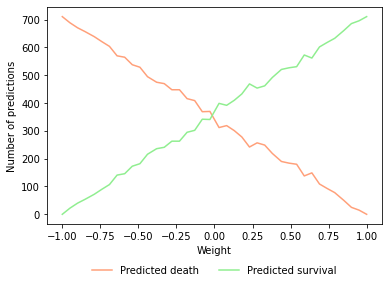

In [29]:
import matplotlib.pyplot as plt
import matplotlib
# create a graph for the number of predicted deaths
deaths, = plt.plot(
weights, # point at x−axis
list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
'lightsalmon', # color of the graph
label='Predicted death'
)
# create a graph for the number of predicted survivals
survivals, = plt.plot(
weights, # point at x−axis
list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
'lightgreen', # color of the graph
label='Predicted survival'
)
plt.legend(handles=[deaths, survivals],loc='upper center',
bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [30]:
l_precision = list(map(lambda step: precision_score(train_labels,l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

/opt/anaconda3/envs/quantum/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


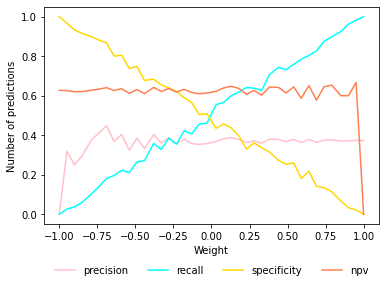

In [31]:
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")
plt.legend(
    handles=[m_precision, m_recall, m_specificity, m_npv],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    framealpha=0.0,
    ncol=4)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

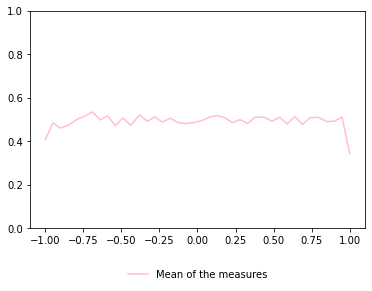

In [32]:
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall,l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")
plt.legend(handles=[m_mean],loc='upper center',bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [33]:
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)
    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)
    print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'.format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'.format(name, cr_npv))
    print('The information level is: {:.2f}'.format(cr_level))

In [34]:
classifier_report("Random PQC",run,classify,train_input,train_labels)

The precision score of the Random PQC classifier is 0.39
The recall score of the Random PQC classifier is 0.51
The specificity score of the Random PQC classifier is 0.52
The npv score of the Random PQC classifier is 0.64
The information level is: 0.51


### Qubit and Quantum states

In [35]:
import qiskit

In [36]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

##### Creating the first qubit

In [37]:
## Creating the first qubit 
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define inital state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0 - zero because is the first and only (in this case) qubit
qc.initialize(initial_state,0)

In [38]:
# Prepare the simulation backend 
from qiskit import execute, Aer 

# Tell Qiskit how to simulate our cirtcuit 
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result 
result = execute(qc,backend).result()

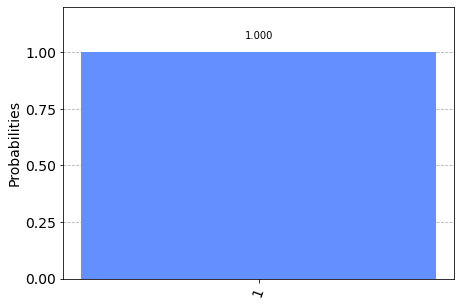

In [39]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 

# get the probability distribution 
counts = result.get_counts()

# show the histogram 
plot_histogram(counts)

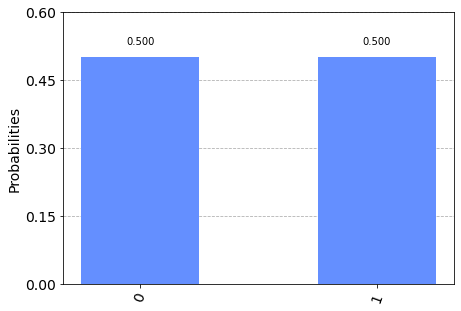

In [40]:
# |ψ> -> common symbol for quantum state
# Define state |psi> as a superposition between |0> and |1>
# initial_state = [1,1] # this does not work because both probabilities of getting 0 and 1 should add to 100%
# So we must weight the the quantum states |0> and |1> with alpha and beta. See page 69 of book -> which leads to 
# |ψ> = [1/sqrt(2), 1/sqrt(2)] because we are considering a 50% to observe zero or one
from math import sqrt
initial_state = [1/sqrt(2), 1/sqrt(2)]

# Redefine the quantum circuit 
qc = QuantumCircuit(1)

# Initialize the 0th qubit in the state 'initial_state' 
qc.initialize(initial_state,0)

# Execute the quantum circuit 
results = execute(qc,backend).result().get_counts()

# Plot the results 
plot_histogram(results)


Equation 3.3. This is the definition of a qubit in superposition. This qubit,
when observed, has the probability of α 2 to result in 0 and β 2 to result in 1 .

|ψ> = α|0> + β|1> = [α,β]


Equation 3.4. This is the required normalization. It requires the sum of the
squared amplitudes (α and β) to equal 1.

α^2 + β^2 = 1

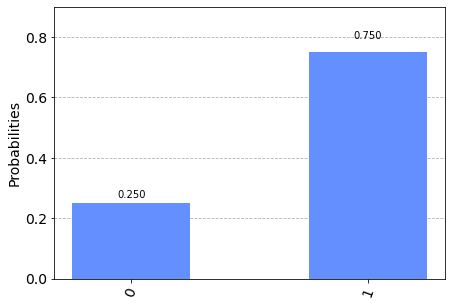

In [41]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt
qc = QuantumCircuit(1)
initial_state = [1/2, sqrt(3)/2] # Here, we insert the state -> This considers a 25% chance of resulting in 0 and 75% of resulting in 1
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

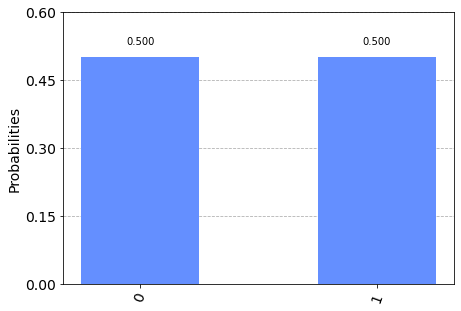

In [42]:
# Using the theta angle to define α and β - refer to pages 72 - 78 of Quantum computing and AI with Python book 
from math import pi, cos, sin 
from qiskit import QuantumCircuit, Aer, execute 
from qiskit.visualization import plot_histogram 

def get_state(theta):
    """returns a valid state vector"""
    return [cos(theta/2),sin(theta/2)]

# playing with the values for theta
theta = -pi/2 # affects the propabilities

# Create, initialize and execute the quantum circuit 
qc = QuantumCircuit(1)
qc.initialize(get_state(theta),0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
counts = result.get_counts()

# Show the plot 
plot_histogram(counts)


In [43]:
qc.draw(output='text')

┌──────────────────────────────┐
q: ┤ Initialize(0.70711,-0.70711) ├
   └──────────────────────────────┘

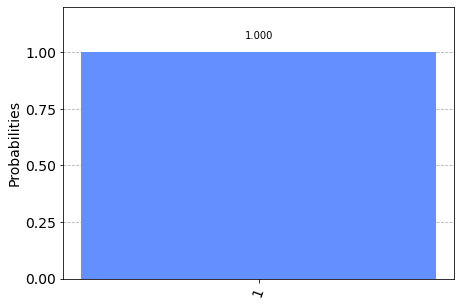

In [51]:
# Circuit with measurement 
from math import sqrt
initial_state = [1/sqrt(2), 1/sqrt(2)]
qc = QuantumCircuit(1)
qc.initialize(initial_state,0)
qc.measure_all() # Causes the qubit out of superposition and collapse in either 0 or 1 -> observer effect -> this is an observation

result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [53]:
qc.draw(output='text')

┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0

### Parameterized Quantum Circuit (PQC)
Used in here to solve the binary classification task

A PQC is a quantum circuit that takes all data it needs as input parameters. Therefore it has its name parameterized. It predicts the label of the thing based on these parameters.

In [54]:
# This would be like the random classifier saw before

from qiskit import execute, Aer, QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

### Parameterized Quantum Circuit (PQC)
def pqc_classify(backend,passenger_state):
    """backend -- a qiskit backend to run the quantum circuit at passenger_state -- a valid quantum state vector"""

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state,0)

    # Measure the qubit
    qc.measure_all()

    # Run the quantum circuit
    result = execute(qc,backend).result()

    # Get the counts, these are either {'0': 1} or {'1': 1}
    counts = result.get_counts()

    # Get the bit 0 or 1 
    return int(list(map(lambda item: item[0], counts.items()))[0])

# Loading training data
import numpy as np
with open('../data/titanic/train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)
with open('../data/titanic/test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

# Running the classifier
backend = Aer.get_backend('statevector_simulator')
initial_state = [1/sqrt(2),1/sqrt(2)]

classifier_report("Random QPC",
    run,
    lambda passenger: pqc_classify(backend,initial_state),
    train_input,
    train_labels)

# This metrics are very similar to that of the random classifier but since we can set the seed, it is not actually random, as with the same seed will yield the same results
# The PQC is actually truly random (when running in a real quantum computer)


The precision score of the Random QPC classifier is 0.32
The recall score of the Random QPC classifier is 0.42
The specificity score of the Random QPC classifier is 0.47
The npv score of the Random QPC classifier is 0.58
The information level is: 0.45
